# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('data/vehicles.csv')
data.head(-5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


There is a considerable gap between maximum value and 75 percentile of columns price and odometer. This shows there is outlier in this dataset

Text(0.5, 1.0, 'Number of missing values in each feature')

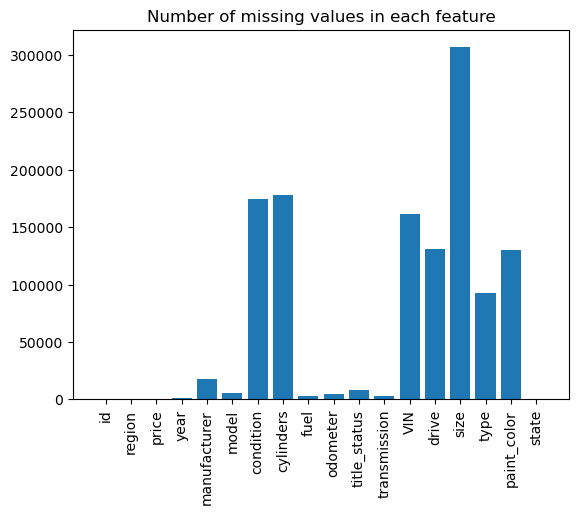

In [5]:
missing_vals = data.isna().sum()
plt.xticks(rotation=90)
plt.bar(x=missing_vals.index, height=missing_vals)
plt.title('Number of missing values in each feature')


It appears that a lot of missing values are in the categorical features. Since there is a high number of missing values in those feature, we will keep them in the data for now. For the numerical features, we drop the rows that contain NULL values.

In [6]:
# Check if there are duplicated rows in the dataset
data.duplicated().sum()

0

No duplicated rows in the dataset.

What is the relation between price of the car and year build?

<BarContainer object of 114 artists>

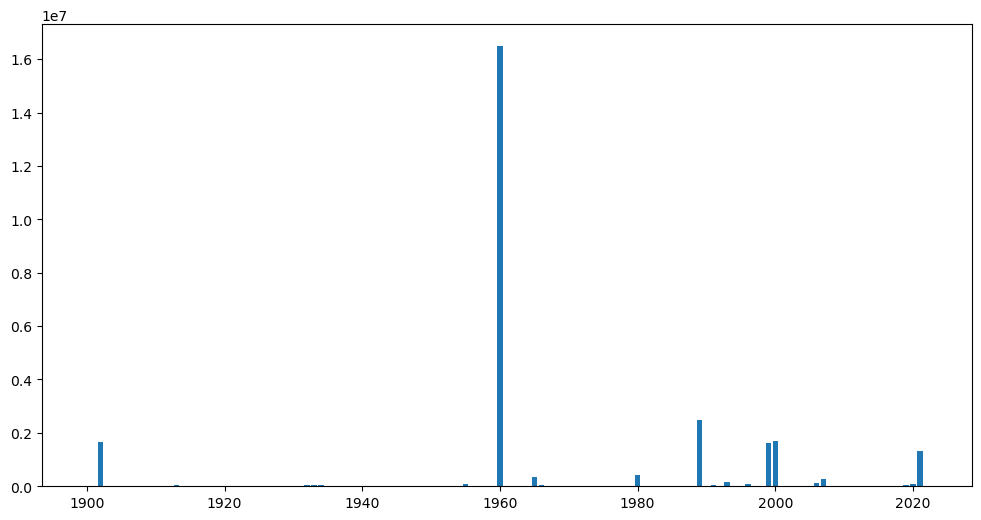

In [7]:
plt.figure(figsize=(12, 6))
mean_price_yearly = data.groupby('year')[['price']].mean().reset_index()
mean_price_yearly['year'] = mean_price_yearly['year'].astype(int)
plt.bar(mean_price_yearly['year'], mean_price_yearly['price'])

As expected, there is an outlier in the year 1960. We have to remove the outliers in the dataset for better analysis.

In [8]:
data[data['year'] == 1960].sort_values('price', ascending=False)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
122470,7315836487,atlanta,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,9999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ga
300647,7302491701,mansfield,79995,1960.0,ford,galaxie 500 starliner,good,8 cylinders,other,4230.0,clean,other,0J53X160453,NaN,NaN,other,NaN,oh
105722,7314299747,orlando,79500,1960.0,chevrolet,corvette fuel injected,NaN,8 cylinders,gas,273.0,clean,manual,00867S102504,rwd,NaN,convertible,black,fl
124011,7314296125,atlanta,79500,1960.0,chevrolet,corvette fuel injected,NaN,8 cylinders,gas,273.0,clean,manual,00867S102504,rwd,NaN,convertible,black,ga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320806,7302867702,medford-ashland,1,1960.0,pontiac,ventura,new,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,or
164628,7316015924,"kansas city, MO",1,1960.0,NaN,any and all,NaN,NaN,other,1.0,clean,other,NaN,NaN,NaN,NaN,NaN,ks
407611,7316951348,seattle-tacoma,1,1960.0,NaN,1960 Lotus Elite,NaN,NaN,gas,34000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,wa
42887,7314559901,orange county,0,1960.0,NaN,"Corvettes, classics, exotics",NaN,NaN,gas,10000.0,clean,other,NaN,NaN,NaN,NaN,NaN,ca


id = 7315849335 and 7315836487 are the records with a very high value. In the next section, data preparation, we will handle these outliers in the numerical features.

In [9]:
# data.drop(index=[280, 122470], inplace=True)

What is the relation between car manufacturer and price of the car considering the title of the car?

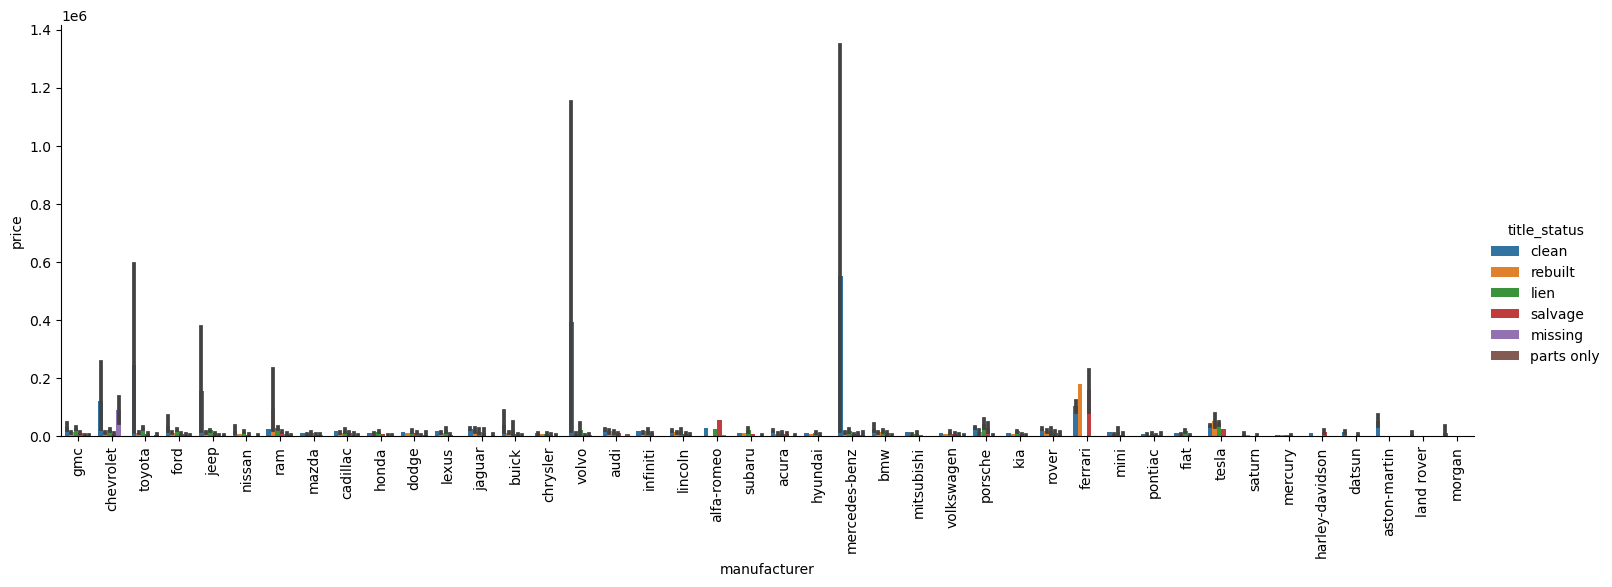

In [10]:
price_manufacture = sns.catplot(data=data, x='manufacturer', y='price', hue='title_status', kind='bar', aspect=3)
price_manufacture.set_xticklabels(rotation=90)

According to the plot, clean title cars have higher price and among all the manufaturers Mercedes-benz and Volvo are higher priced in this dataset.

Top 10 manufacturer based on the number of records available

Text(0.5, 1.0, 'Number of cars in each car brand')

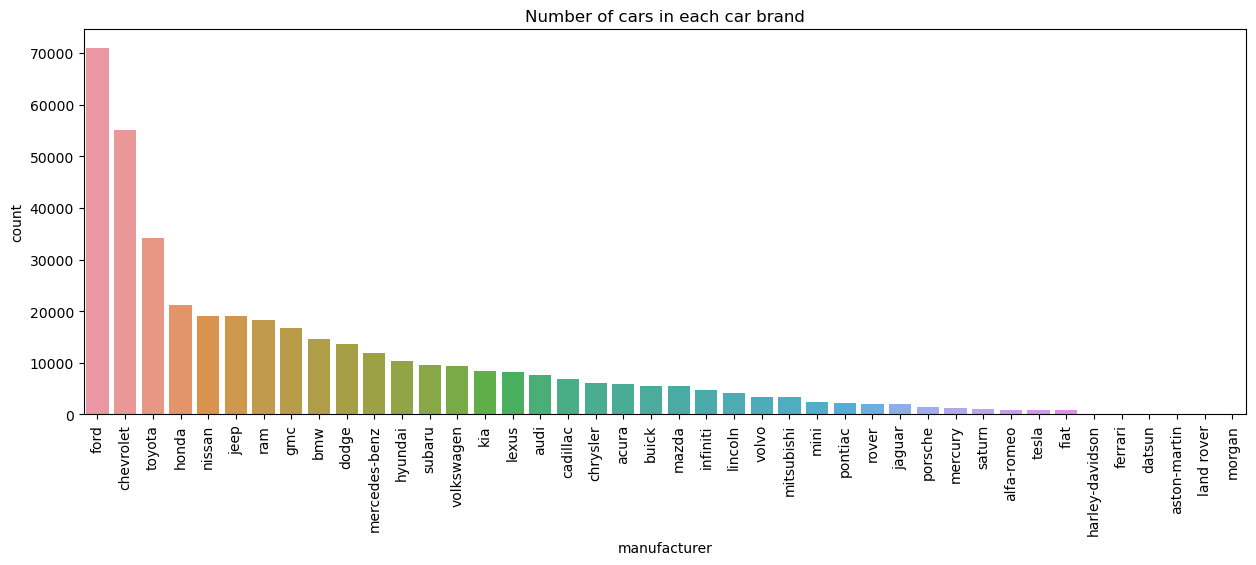

In [11]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.countplot(data=data, x='manufacturer', order=data['manufacturer'].value_counts(ascending=False).index)
plt.title("Number of cars in each car brand")

According to this plot, American brands like Ford and Chevrolet are the most prevalent, with a signification proportion of the total vehicles being of these makes. Toyota and Honda also feature prominently in the dataset with a substantial number of their models represented. It is interesting to see that the most expensive cars that was obsereved in the previous plot are not on the top produced car brands.

What is breakdown of car conditions and number of cylinders in the dataset?

In [12]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

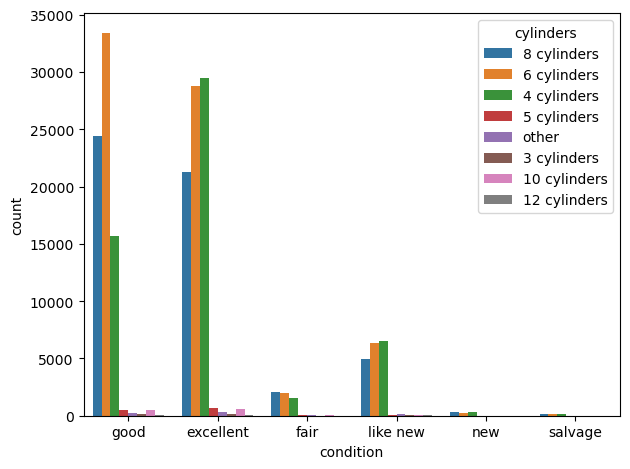

In [13]:
sns.countplot(data=data, x='condition', hue='cylinders')
plt.tight_layout()

The prevalence of 4-cylinder engines is higher in new cars, while older cars in good condition ten to have bigger engine, 6 cylinders. This can be attributed to engineers opting for smaller enginers to enhance efficiency while manitaning comparable power outpu and reducing fuel consumption.

Does color have any effect on the price?

<Axes: xlabel='paint_color', ylabel='price'>

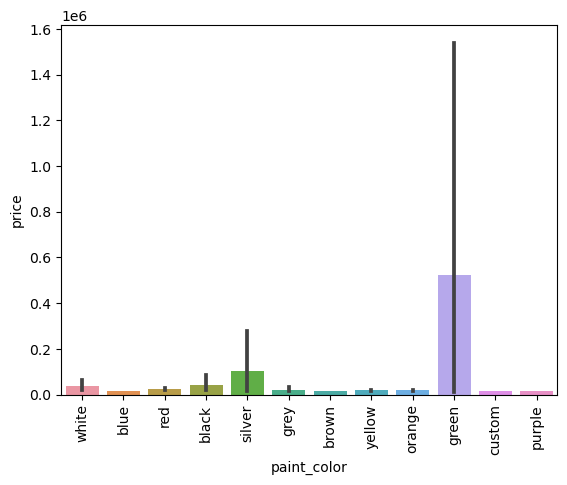

In [14]:
plt.xticks(rotation=90)
sns.barplot(data=data, x='paint_color', y='price')

Interestingly the green color car are of higher price comparing to others. This shows that color affects the price of the color to an extent.

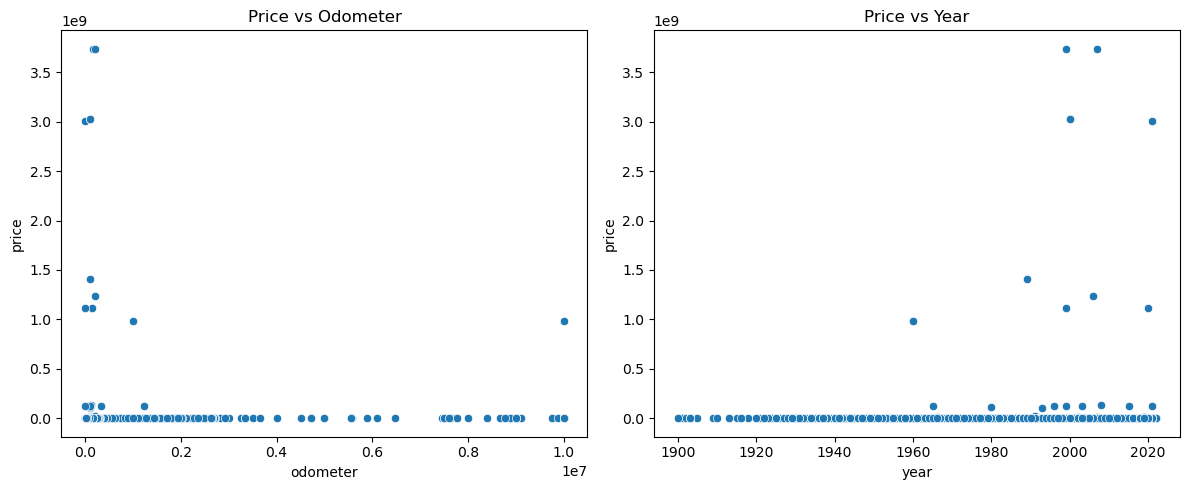

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='odometer', y='price', data=data, ax=ax[0])
ax[0].set_title('Price vs Odometer')
sns.scatterplot(x='year', y='price', data=data, ax=ax[1])
ax[1].set_title('Price vs Year')
plt.tight_layout()

From the two plots above, the newer cars have lower milage on them. However, due to existence of outliers, we cannot see the values properly. In the section, where we handle outliers we can take a look at this relationship once more.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

There are many missing values in Size, there fore I will drop the column. I also drop id an VIN columns as they do not provide much useful information to us.

In [16]:
# Drop the columns that are not providing information about the car price
data = data.drop(['id', 'VIN', 'size'], axis=1)

For the rest of the [drive, paint_color, type] columns, I fill the missing values by replacing NULL values by the most frequent value in that column (most frequent feature value)

In [17]:
data['drive'] = data['drive'].fillna(data['drive'].value_counts().index[0])
data['paint_color'] = data['paint_color'].fillna(data['paint_color'].value_counts().index[0])
data['type'] = data['type'].fillna(data['type'].value_counts().index[0])

In [18]:
data.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive                0
type                 0
paint_color          0
state                0
dtype: int64

In [19]:
# check the most frequent values of title status
data['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

Most of the vehicles available in the dataset have the 'clean' title. So I replace all the missing values with 'clean'

In [20]:
data['title_status'] = data['title_status'].fillna('clean')

In [21]:
# Before fill missing values for cylinders and condition of the car, I drop the null values of the rest of the columns. My assumption is that removing those rows automatically reduces the number of missing values
# in the cylinders and condition.
data.dropna(subset=['year', 'manufacturer', 'model', 'fuel', 'odometer', 'transmission'], inplace=True)

In [22]:
data.isna().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       158569
cylinders       162064
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type                 0
paint_color          0
state                0
dtype: int64

In [23]:
# As expected the number of missing values for condition and cylinders are reduced. Now let's try to fill those values.
# Based on my experience, 30k, 60k, and 100k are major odometers important to dealer when you want to sell/buy a car. Therefore, I used the same ranges here.
odometer_ranges = [0, 30000, 60000, 100000, 1000000]
odo_cond_groups = data.groupby(['condition', pd.cut(data.odometer, odometer_ranges)])
odo_cond_groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 100000]","(100000, 1000000]"
condition,,,,
excellent,8112,12467,24698,49250
fair,234,164,624,4826
good,39246,22569,17273,35841
like new,4349,3774,4628,7168
new,667,108,132,210
salvage,36,45,81,357


It appears that up to 100k miles, 'good' condition is prevalent. And the car over 100k miles are in excelent condition. Therefore, I use the same logic to fill the missing values. It a little bit counter intuitive that the cars with higher milleange are in a better condition compared to those of low milleage.

In [24]:
data.loc[data['odometer'] <= 100000, 'condition'] = data.loc[data['odometer'] <= 100000, 'condition'].fillna('good')
data.loc[data['odometer'] > 100000, 'condition'] = data.loc[data['odometer'] > 100000, 'condition'].fillna('excellent')

In [25]:
# last but not least let's handle the missing value for cylinders
data.groupby(['drive', 'cylinders'])[['cylinders']].count()

cylinders
drive cylinders              
4wd   10 cylinders        701
      12 cylinders         29
      3 cylinders         212
      4 cylinders       26529
      5 cylinders         494
      6 cylinders       53246
      8 cylinders       44620
      other               458
fwd   10 cylinders          9
      12 cylinders          4
      3 cylinders         307
      4 cylinders       42424
      5 cylinders         894
      6 cylinders       21214
      8 cylinders        1225
      other               243
rwd   10 cylinders        609
      12 cylinders         80
      3 cylinders          19
      4 cylinders        4571
      5 cylinders         150
      6 cylinders       14682
      8 cylinders       21350
      other               200

In [26]:
# for each type of drive, replace the missing value with the most frequent cylinder type
cylinder_type = {'4wd':'6 cylinders', 'fwd':'4 cylinders', 'rwd':'8 cylinders'}
data.loc[data['cylinders'].isna(), 'cylinders'] = data.loc[data['cylinders'].isna(), 'drive'].map(lambda x: cylinder_type[x])

In [27]:
data.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

Now that there is not any missing value in the dataset, let's handle the outliers.

<Axes: xlabel='price'>

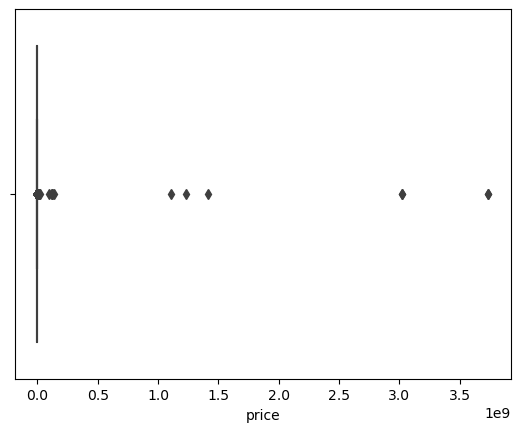

In [28]:
# Let's look at the boxplot of year, price, and odometer to see if there are outliers there. According to our plots in the previous section, there are some outliers in the price feature
sns.boxplot(x=data['price'])

<Axes: xlabel='year'>

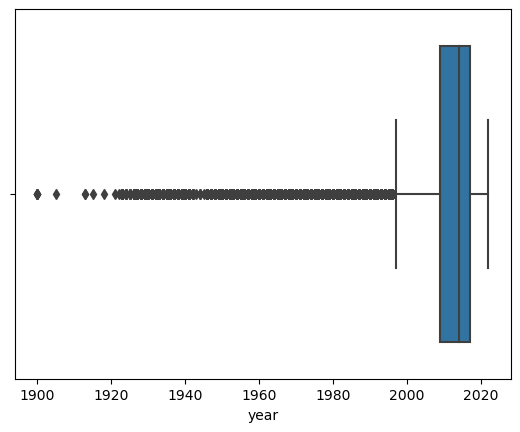

In [29]:
sns.boxplot(x=data['year'])

<Axes: xlabel='odometer'>

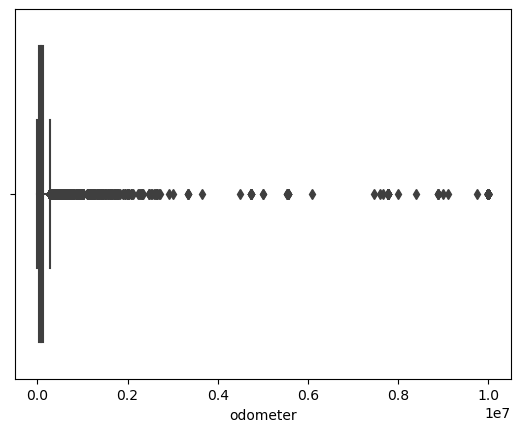

In [30]:
sns.boxplot(x=data['odometer'])

In [31]:
# remove outliers using 1.5IQR method
"""
Sort your data from low to high.
Identify the first quartile (Q1), the median, and the third quartile (Q3).
Calculate your IQR = Q3 – Q1.
Calculate your upper bound = Q3 + (1.5 * IQR)
Calculate your lower bound = Q1 – (1.5 * IQR)
"""
def removeOutliers(data, feature_name):
    feature_percentile_25 = data[feature_name].quantile(.25)
    feature_percentile_75 = data[feature_name].quantile(.75)
    feature_iqr = feature_percentile_75 - feature_percentile_25
    
    min_feature = data[feature_name].quantile(.10)
    max_feature = feature_percentile_75 + (1.5 * feature_iqr)

    data = data[(data[feature_name] > min_feature) & (data[feature_name] < max_feature)]

    return data

In [32]:
data = removeOutliers(data, 'price')
data = removeOutliers(data, 'odometer')
data = removeOutliers(data, 'year')

<Axes: xlabel='odometer'>

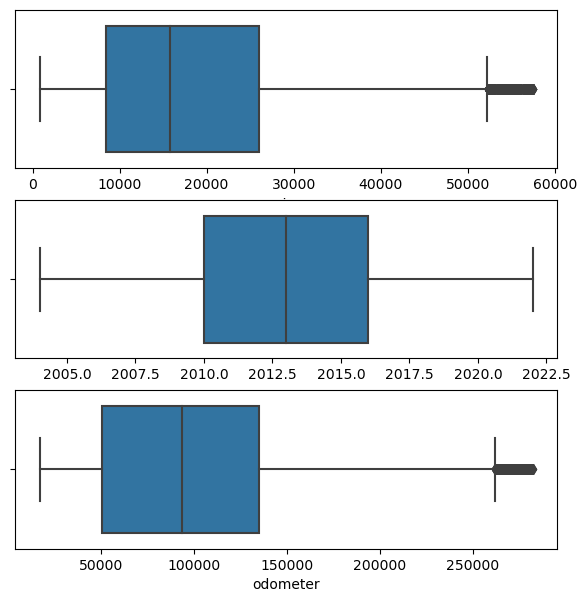

In [33]:
# Let's look at the data after removing the outliers
plt.figure(figsize=[7, 7])
plt.subplot(311)
sns.boxplot(x=data['price'])
plt.subplot(312)
sns.boxplot(x=data['year'])
plt.subplot(313)
sns.boxplot(x=data['odometer'])

<Axes: xlabel='year', ylabel='price'>

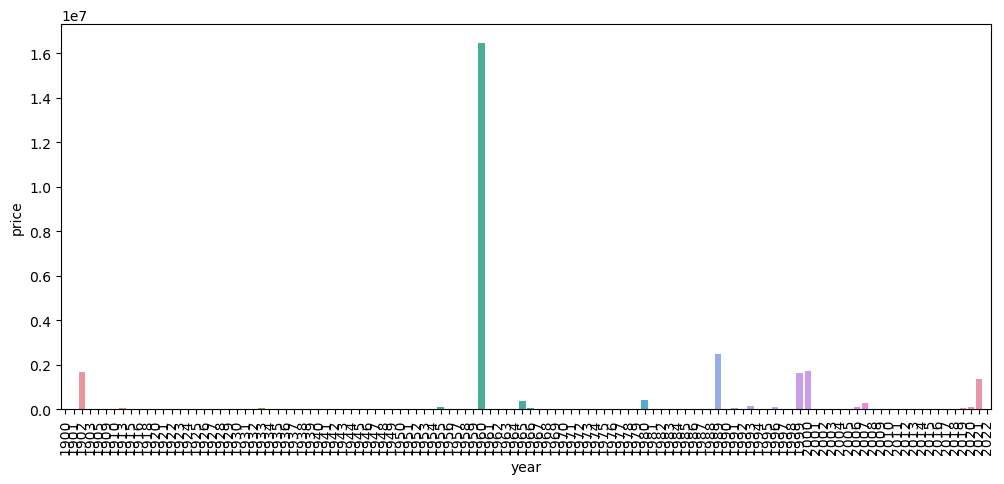

In [34]:
# Let's look at the plots one more time after removing the outliers
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(data=mean_price_yearly, x='year', y='price')

In [35]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [36]:
data['cylinders'].value_counts()

6 cylinders     146361
4 cylinders      80703
8 cylinders      49401
5 cylinders       1267
10 cylinders       681
other              510
3 cylinders        246
12 cylinders        32
Name: cylinders, dtype: int64

In [37]:
# lets convert categorical features to numerical by allocating an integer value for each of the categries in those features.
categorical_features = ['region', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']

# use label encoder from sklearn
encoder = LabelEncoder()

for cat_feature in categorical_features:
    data[cat_feature] = encoder.fit_transform(data[cat_feature])

data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,12532,2,6,2,57923.0,0,2,0,8,10,1
28,16,22590,2010.0,7,12778,2,6,2,71229.0,0,2,0,8,1,1
29,16,39590,2020.0,7,12800,2,6,2,19160.0,0,2,0,8,8,1
30,16,30990,2017.0,37,14776,2,6,2,41124.0,0,2,0,8,8,1
31,16,15000,2013.0,12,6291,0,5,2,128000.0,0,0,2,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,397,32590,2020.0,25,2960,2,6,2,19059.0,0,2,2,9,10,50
426874,397,33590,2018.0,22,8259,2,5,2,30814.0,0,0,2,9,10,50
426875,397,23590,2019.0,29,9591,2,5,2,32226.0,0,2,1,9,10,50
426878,397,28990,2018.0,22,5589,2,5,2,30112.0,0,2,1,9,9,50


Now that all the data is numerical let's look at the correlation matrix to see the correlation between pair of features since we are going to apply linear regression models.

<Axes: >

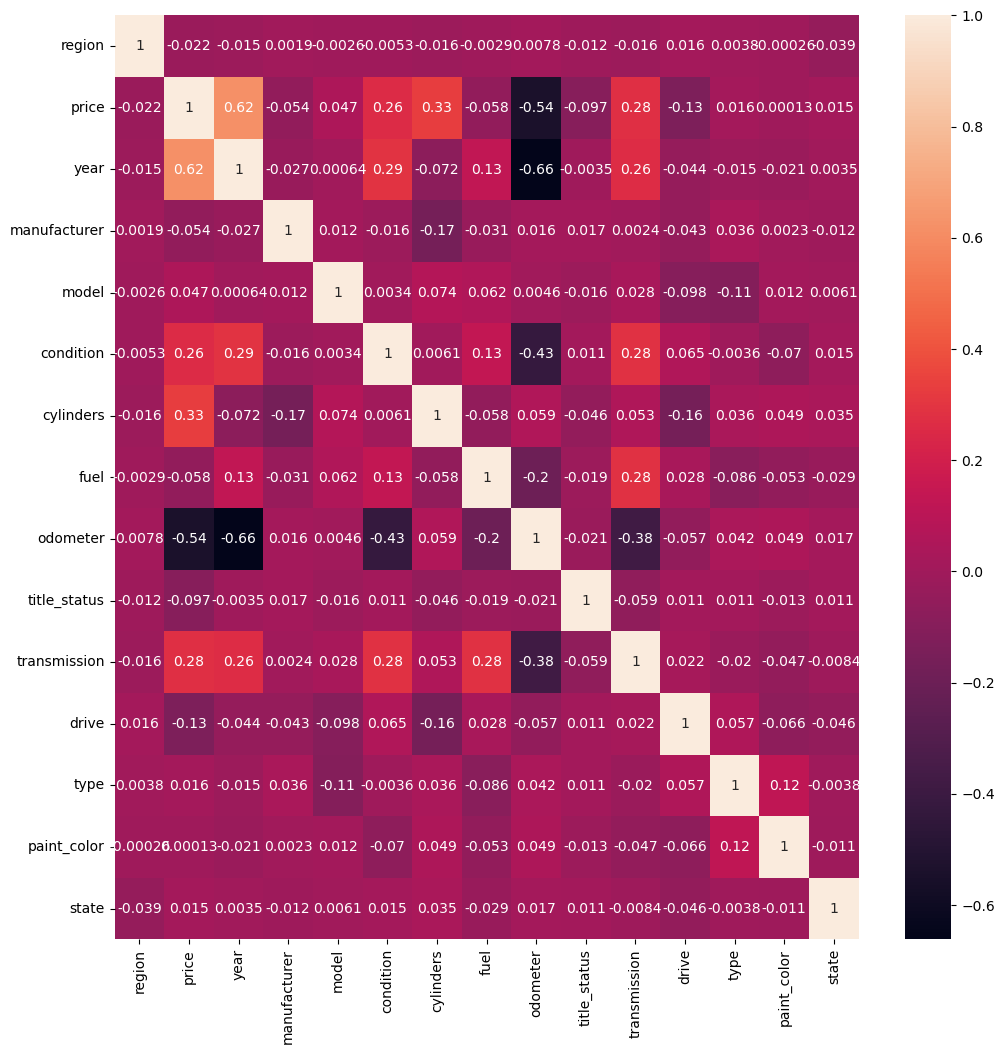

In [38]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True)

According to this correlation matrix, we can infer that the price of a vehicle has correlations with year, condition, cylinders, odometer, transmission, and drive. Therefore, I will use these features to make my model.

In [39]:
data_correlated = data[['year', 'condition', 'cylinders', 'odometer', 'transmission', 'drive', 'price']]
data_correlated.head()

,year,condition,cylinders,odometer,transmission,drive,price
27,2014.0,2,6,57923.0,2,0,33590
28,2010.0,2,6,71229.0,2,0,22590
29,2020.0,2,6,19160.0,2,0,39590
30,2017.0,2,6,41124.0,2,0,30990
31,2013.0,0,5,128000.0,0,2,15000


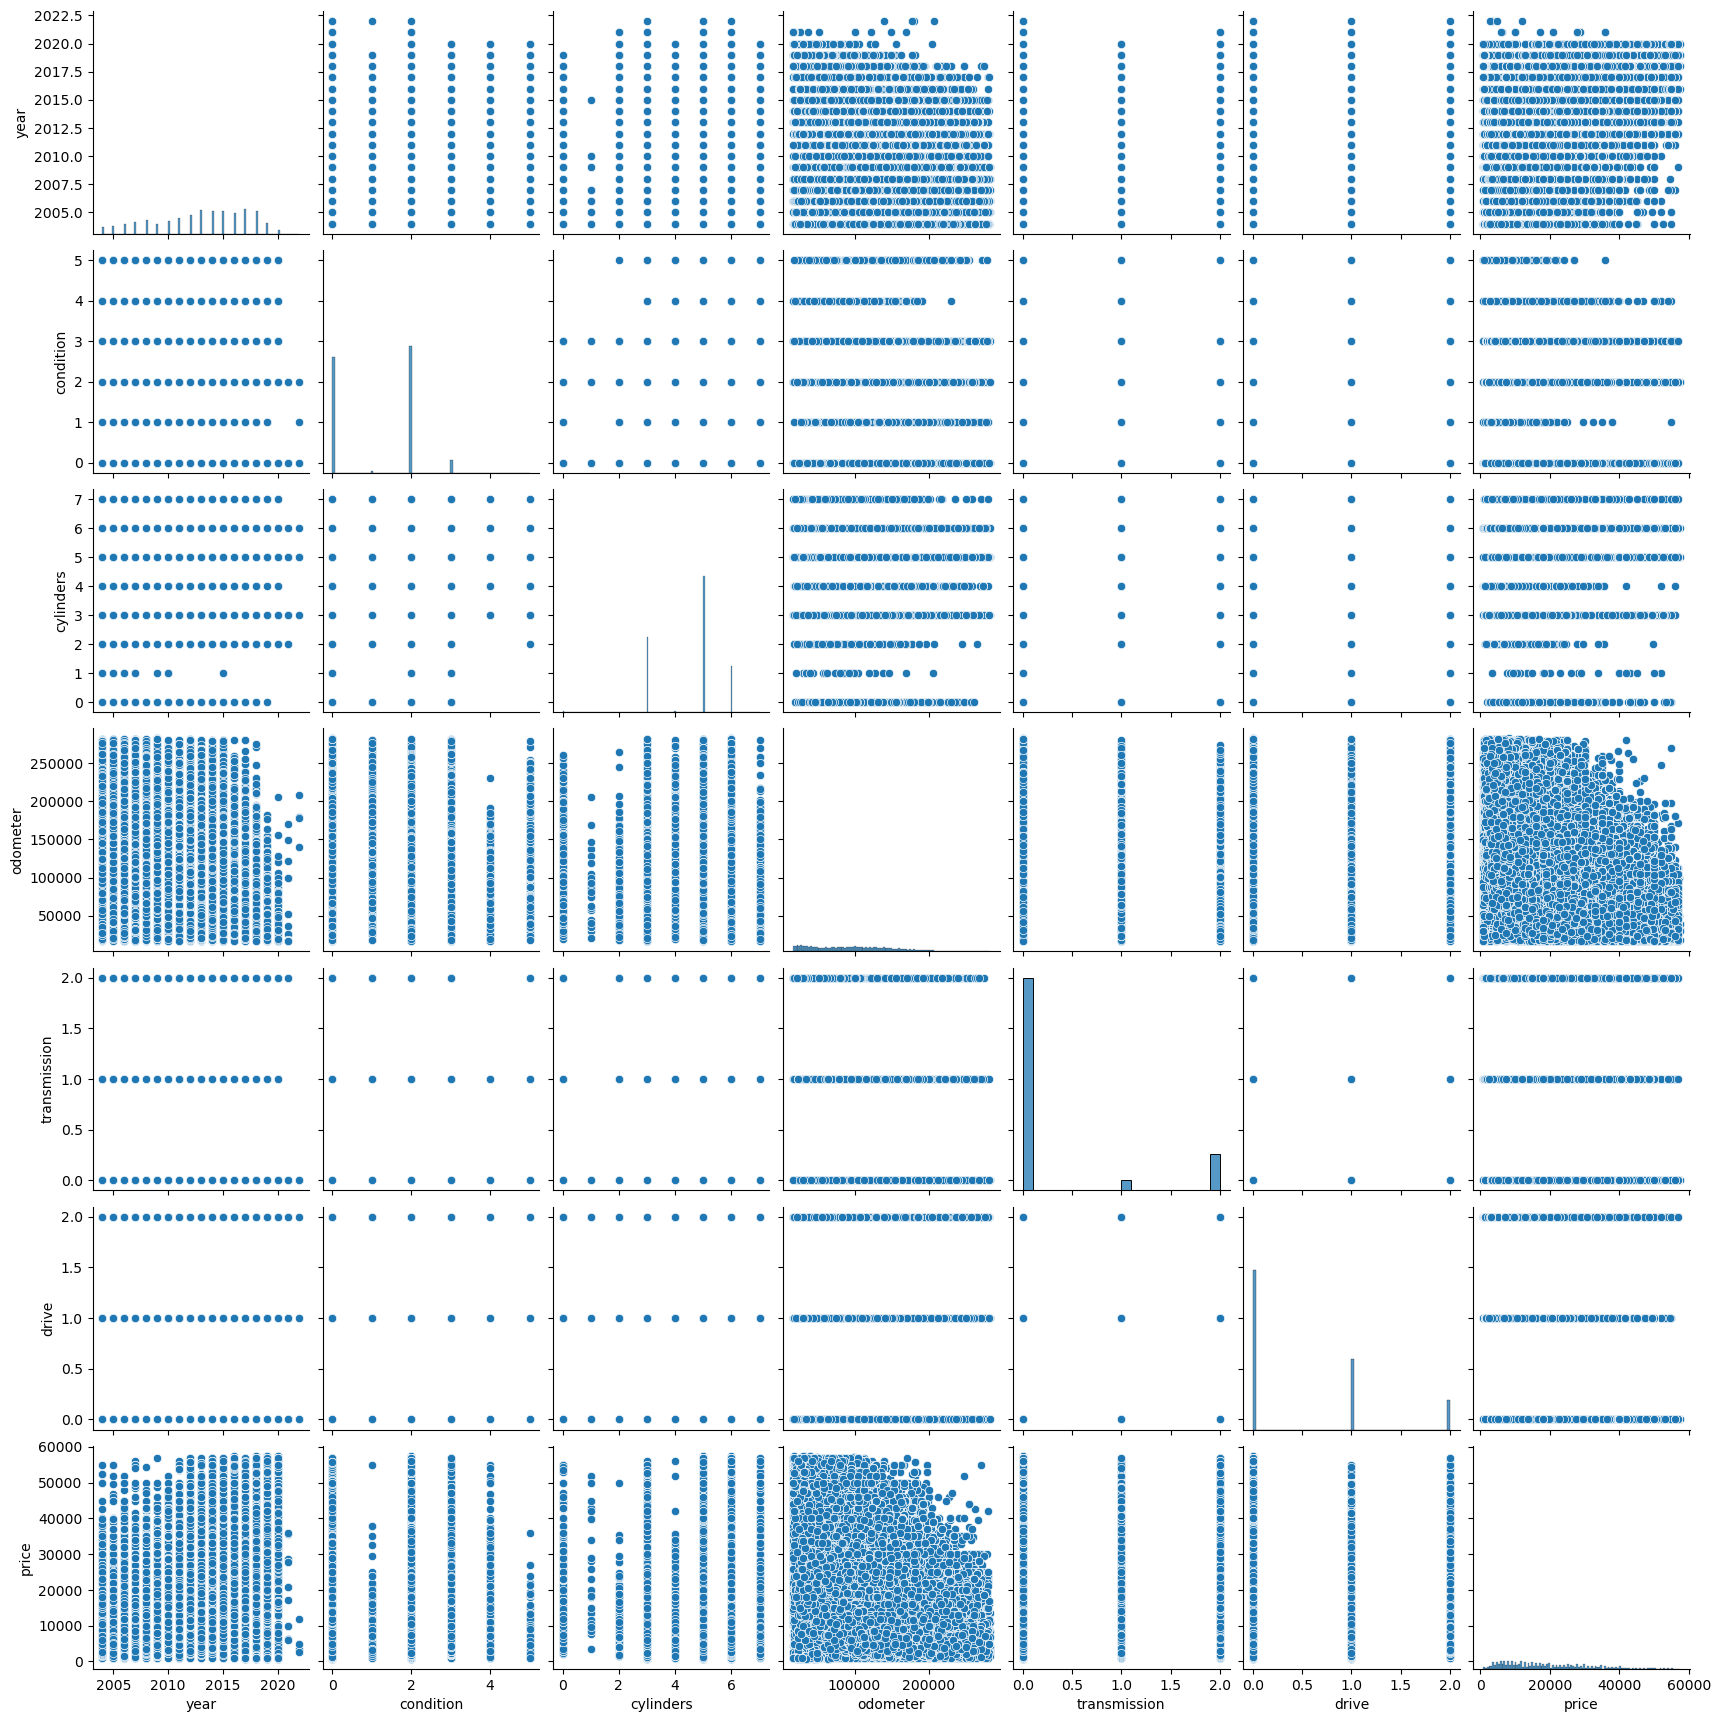

In [40]:
sns.pairplot(data_correlated)

In [41]:
# Now create the train and test splits
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [42]:
X_train.shape

(195440, 14)

In [43]:
y_train.shape

(195440,)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

For this part, I fitted three models:

    1- Linear Regression
    2- Rige Regression
    3- Lasso Regression

#### Linear Regression

In [44]:
# create a function to calculate mean squared, mean absolute, and r^2 scores for the predictions
def error_calculator(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse: .4f}")
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse: .4f}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae: .4f}")
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 score: {r2: .4f}")

    return [mse, rmse, mae, r2]

In [45]:
# Create a pipeline with standard scaler and LinearRegression

pipeline_lr = make_pipeline(StandardScaler(), LinearRegression())

# set up K-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# perform k-fold cross validation and get mean square error scores
mses = cross_val_score(pipeline_lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# convert negative squared errors to positive
mses *= -1

mse_lr_train = mses.mean()

print(f"Train mean squared error across all folds: {mse_lr_train}")

Train mean squared error across all folds: 57598279.67026901


In [46]:
# check the performance on the test data
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

errors_lr = error_calculator(y_test, y_pred_lr)

MSE:  57643272.0211
RMSE:  7592.3166
MAE:  5703.2122
R^2 score:  0.5944


#### Ridge Regression

To find the best alpha value in Ridge, I used grid search over a set of alpha values.

In [47]:
# Create a pipeline with Ridge
pipeline_ridge = make_pipeline(StandardScaler(), Ridge())

# Define a range of alpha values to search over using gridsearchCV
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'ridge__alpha': alphas}

# Create GridSearchCV with the pipeline and parameter grid
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['ridge__alpha']
print(f'Best Alpha for Ridge: {best_alpha_ridge}')

Best Alpha for Ridge: 10.0


In [48]:
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

errors_ridge = error_calculator(y_test, y_pred_ridge)

MSE:  57643276.0005
RMSE:  7592.3169
MAE:  5703.2062
R^2 score:  0.5944


Lasso Regression

Lasso also has an alpha parameter. To find the best alpha value in Lasso, I used grid search over a set of alpha values.

In [49]:
# Create a pipeline with standard scaler and lasso
pipeline_lasso = make_pipeline(StandardScaler(), Lasso())

# Define a list of alph to search over
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = {'lasso__alpha': alphas}

# Create a GridSearchCV with the pipeline and paramgrid
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X_train, y_train)

# Get the best alpha value
best_alpha_lasso = grid_search_lasso.best_params_['lasso__alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

Best alpha for Lasso: 1.0


In [50]:
best_model_lasso = grid_search_lasso.best_estimator_

y_pred_lasso = best_model_lasso.predict(X_test)

errors_lasso = error_calculator(y_test, y_pred_lasso)

MSE:  57643218.4196
RMSE:  7592.3131
MAE:  5703.1938
R^2 score:  0.5944


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [51]:
# Let's compare the model performance first
all_models = [errors_lr, errors_ridge, errors_lasso]
performance_df = pd.DataFrame(all_models, columns=['MSE', 'RMSE', 'MAE', 'R^2'], index=['Linear Regression', 'Ridge', 'Lasso'])
performance_df

,MSE,RMSE,MAE,R^2
Linear Regression,5.764327e+07,7592.316644,5703.212248,0.594413
Ridge,5.764328e+07,7592.316906,5703.206245,0.594413
Lasso,5.764322e+07,7592.313114,5703.193840,0.594413


A slight improvement can be seen in the Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) value with Lasso compare to Linear Regression and Ridge Regression. It indicates that Lasso mihg be providing a slightly better fit ot the data. Based on my observations and the idea behind lasso:

1. Lasso Regression includes a regularization term that encourages sparsity in the coefficients. This means that some coefficients can be exactly zero, effectively performing feature selection.
If the dataset has redundant or less informative features, Lasso may automatically identify and exclude them from the model. This can lead to a more parsimonious model with better generalization to unseen data.
2. Lasso introduces an additional penalty term based on the absolute values of the coefficients. This can be particularly effective when there is a suspicion that some features might be irrelevant or have a very small impact on the target variable.
The small improvement in RMSE and MAE suggests that the regularization effect of Lasso is helping to reduce overfitting and enhance the model's generalization.

In [52]:
lasso_coefs = best_model_lasso.named_steps['lasso'].coef_
lasso_coefs

array([  -76.74497669,  5593.5779096 ,   170.43838791,   274.94064446,
         205.70268248,  4168.46459312, -2039.65111108, -2987.68090744,
        -984.84840608,   930.20200789,  -775.52295739,   171.35952076,
         -87.59411301,     9.15561447])

In [53]:
important_features = [X_train.columns[i] for i in range(len(lasso_coefs)) if lasso_coefs[i] != 0]

In [54]:
for feature, coefficient in zip(X_train.columns, lasso_coefs):
    print(f'{feature}: {coefficient}')

region: -76.74497669483797
year: 5593.5779095986545
manufacturer: 170.43838790516145
model: 274.9406444618884
condition: 205.70268247831368
cylinders: 4168.464593124447
fuel: -2039.651111075709
odometer: -2987.680907435381
title_status: -984.8484060779415
transmission: 930.2020078921136
drive: -775.5229573928001
type: 171.35952075525276
paint_color: -87.59411300926435
state: 9.155614474815923


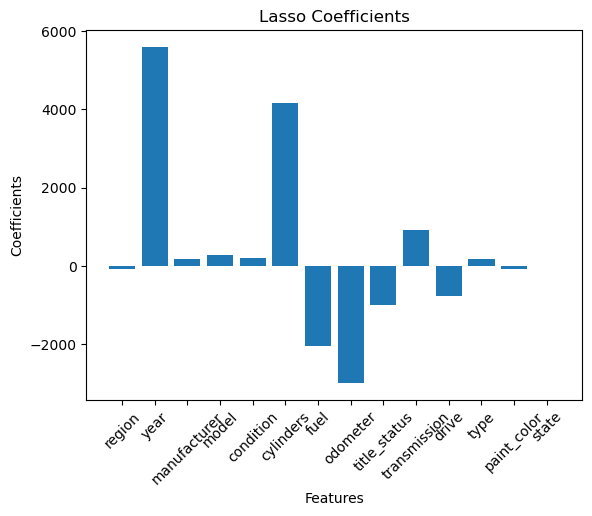

In [55]:
feature_names = X_train.columns
plt.bar(range(len(feature_names)), lasso_coefs)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.show()

**Note: Since we used StandardScaler to normalize each feature, we can compare them directly in terms of their importance.**

Standardization: StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1. This ensures that all features are on a comparable scale, and the coefficients represent the change in the target variable per standard deviation change in the corresponding feature.

Comparability of Coefficients: With standardized features, the coefficients in the Lasso model can be directly compared. The coefficient magnitude indicates the strength of the impact, and positive or negative sign indicates the direction of the impact.

Relative Importance: Larger absolute values of coefficients correspond to features that have a larger impact on the target variable. Features with zero coefficients have been effectively excluded from the model by Lasso's regularization.

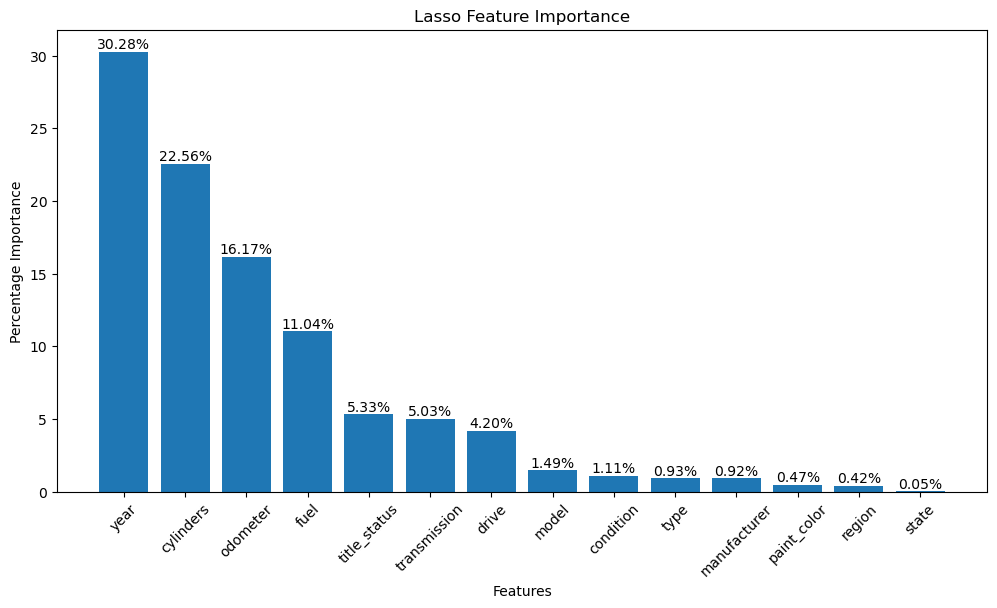

In [56]:
# Get the percentage importance of each feature

total_importance = np.sum(np.abs(lasso_coefs))
percentage_importance = np.abs(lasso_coefs) / total_importance * 100

sorted_indides = np.argsort(percentage_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indides]
sorted_percentage_importance = percentage_importance[sorted_indides]

# Plot the sorted percentage importance of each feature
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(sorted_features)), sorted_percentage_importance)
ax.set_xticks(range(len(sorted_features)))
ax.set_xticklabels(sorted_features, rotation=45)
ax.set_xlabel('Features')
ax.set_ylabel('Percentage Importance')
ax.set_title('Lasso Feature Importance')

# Display the percentage values on top of each bar
for bar, percentage in zip(bars, sorted_percentage_importance):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [62]:
for i in range(len(sorted_features)):
    print(f"{sorted_features[i]} : {sorted_percentage_importance[i]:.2f}%")

year : 30.28%
cylinders : 22.56%
odometer : 16.17%
fuel : 11.04%
title_status : 5.33%
transmission : 5.03%
drive : 4.20%
model : 1.49%
condition : 1.11%
type : 0.93%
manufacturer : 0.92%
paint_color : 0.47%
region : 0.42%
state : 0.05%


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

This report is here to help you make smarter choices for your used car business. We looked at lots of info to figure out what makes people pay more for a used car. Let's dive into what we found so you can adjust your car collection for better sales.

**Key Findings**

**Year Matters Most (30.28%):**

A newer car is a big deal to buyers—30.28% big. Focus on bringing in more recent models to drive up your sales.

**Cylinders Impact (22.56%):**

People pay attention to how many cylinders a car has, making up 22.56% of the price decision. From our data, it seems newer models often have 4 cylinders and smaller engines. Keep this in mind when stocking your lot.

**Odometer Reading (16.17%):**

Mileage matters, contributing to 16.17% of the pricing picture. Keep a close watch on the odometer readings and adjust your prices accordingly.

**Fuel Type (11.04%):**

The type of fuel a car uses affects the price, though a bit less at 11.04%. Be aware of local preferences and make adjustments to your inventory.

**Clean Title Status and Transmission (5.33% and 5.03%):**

Buyers like cars with a clean title, and transmission type matters too. It's not the biggest factor, but 5.33% and 5.03% matter. Try to get more cars with clean titles—they're a hit with buyers.

**Drive, Model, Condition, and Type (4.20%, 1.49%, 1.11%, 0.93%):**

These factors add up to 4.20%, 1.49%, 1.11%, and 0.93%. While not the main focus, they still count. Make sure your cars match what people like in these areas.

**Manufacturer, Paint Color, Region, State (0.92%, 0.47%, 0.42%, 0.05%):**

These factors matter a bit less, like 0.92%, 0.47%, 0.42%, and 0.05%. Don't forget them, but put more emphasis on the bigger factors.

**Recommendations:**

Bring in more recent cars with clean titles, 4 cylinders, and smaller engines. Keep an eye on fuel preferences. Also, tailor your inventory to suit different buyer preferences in smaller details.

### Future Steps

Now that we've uncovered the key factors driving used car prices, the next step is to empower you with a powerful tool. We're introducing a user-friendly software—a piece of code that harnesses the insights from our analysis. This tool internally utilizes the trained Lasso model, which has proven to be the most effective in predicting car values accurately.

Dealers are invited to leverage this intuitive tool. By entering specific car details—year, cylinders, odometer reading, fuel type, title status, and transmission—the software utilizes our advanced Lasso model. This results in a real-time estimate of the car's value, based on the most impactful factors determined through our thorough analysis.

##### Benefits of the software
**Precision:** The Lasso model ensures accurate estimates, prioritizing the factors that matter most according to our analysis.

**Time-Saving:** Dealers can bypass manual calculations and receive quick, reliable estimates, expediting decision-making processes.

**Optimized Inventory Management:** The tool enables dealers to align their inventory with market preferences, maximizing profitability.